# Introduction

wait for fina version


# Data Description

wait for final text

# Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from math import log10
from sklearn.model_selection import cross_val_score
import shap
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [95]:
#ndtv = load_svmlight_file("/kaggle/input/tv-news-channel-commercial-detection-dataset/NDTV.txt")
#cnn = load_svmlight_file("/kaggle/input/tv-news-channel-commercial-detection-dataset/CNN.txt")
#bbc = load_svmlight_file("/kaggle/input/tv-news-channel-commercial-detection-dataset/BBC.txt")
#cnnibn = load_svmlight_file("/kaggle/input/tv-news-channel-commercial-detection-dataset/CNNIBN.txt")
#imesnow = load_svmlight_file("/kaggle/input/tv-news-channel-commercial-detection-dataset/TIMESNOW.txt")

In [96]:
# Loading all our data. Same format from different files representing different television channels.
ndtv = load_svmlight_file("D:/data_storage/Projects/ml_commercial_detection/TV_News_Channel_Commercial_Detection_Dataset/NDTV.txt")
cnn = load_svmlight_file("D:/data_storage/Projects/ml_commercial_detection/TV_News_Channel_Commercial_Detection_Dataset/CNN.txt")
bbc = load_svmlight_file("D:/data_storage/Projects/ml_commercial_detection/TV_News_Channel_Commercial_Detection_Dataset/BBC.txt")
cnnibn = load_svmlight_file("D:/data_storage/Projects/ml_commercial_detection/TV_News_Channel_Commercial_Detection_Dataset/CNNIBN.txt")
timesnow = load_svmlight_file("D:/data_storage/Projects/ml_commercial_detection/TV_News_Channel_Commercial_Detection_Dataset/TIMESNOW.txt")

In [97]:
# Combining all 5 channels into one
x, y = sc.sparse.vstack([ndtv[0], cnn[0], bbc[0], cnnibn[0], timesnow[0]]), np.concatenate([ndtv[1], cnn[1], bbc[1], cnnibn[1], timesnow[1]])

# Exploratory Data Analysis

Below we see x and y have the same rows which means the data has been combined well

In [98]:
x.shape, y.shape

((129685, 4125), (129685,))

In [99]:
type(x)

scipy.sparse._csr.csr_matrix

In [100]:
# Convert from a sparse matrix to a pandas Dataframe
df = pd.DataFrame.sparse.from_spmatrix(x)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124
0,29.0,3.821209,1.567568,13.547628,7.242389,0.019883,0.012195,0.067241,0.049107,3406.866211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.524255,0.866498
1,25.0,3.052969,1.641484,22.334589,15.734018,0.023027,0.010731,0.077000,0.045884,3324.158203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072369,0.534711
2,82.0,1.601274,1.508805,5.860583,3.301121,0.025948,0.006956,0.082317,0.044845,3771.984131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.552685,0.918764
3,25.0,4.819368,2.879584,41.382828,24.448074,0.014387,0.007596,0.069875,0.046916,3301.686035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117911,0.223210
4,29.0,2.768753,1.797319,13.338054,9.980667,0.011506,0.007269,0.100647,0.067401,3266.021484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529581,0.968130


For the datatypes, as seen below, we have all columns made of Sparse matrices, whereas it should be float. We will fix this in the next section

In [101]:

df.dtypes

0       Sparse[float64, 0]
1       Sparse[float64, 0]
2       Sparse[float64, 0]
3       Sparse[float64, 0]
4       Sparse[float64, 0]
               ...        
4120    Sparse[float64, 0]
4121    Sparse[float64, 0]
4122    Sparse[float64, 0]
4123    Sparse[float64, 0]
4124    Sparse[float64, 0]
Length: 4125, dtype: object

In [102]:
df.count()

0       129685
1       129685
2       129685
3       129685
4       129685
         ...  
4120    129685
4121    129685
4122    129685
4123    129685
4124    129685
Length: 4125, dtype: int64

In [103]:
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
4120    0
4121    0
4122    0
4123    0
4124    0
Length: 4125, dtype: int32

# Data Preprocessing

For preprocessing, first we will drop all bag of word and binned data. The first 17 columns of our data set have mean and variance values, thus, we can afford to lose the individual bins.

In [104]:
df.drop(df.iloc[:, 17:4123], inplace=True, axis=1)

In [105]:
df.shape

(129685, 19)

Here we will convert all our rows to float from sparse.

In [106]:
for i in df.columns:
    df[i] = df[i].values.to_dense().astype(np.float64)

In [107]:
df.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
4123    float64
4124    float64
dtype: object

Next step is to add the labels to our dataframe for when we split our dataset by rows.

In [108]:
df['label'] = y.astype(int).tolist()

In [109]:
df['label'].value_counts()

 1    82231
-1    47454
Name: label, dtype: int64

As seen above, the labels are 1 and -1. Since binary labels are preferred, -1 is converted to 0 below

In [110]:
df.loc[df['label'] == -1, 'label'] = 0
df['label'].value_counts()

1    82231
0    47454
Name: label, dtype: int64

Let's give the non bag of words features their names

In [112]:
#Let's give the columns their names
df.rename(columns={
 0:'shot_length',
 1:'motion_distribution_mean',
 2:'motion_distribution_variance',
 3:'frame_difference_distribution_mean',
 4:'frame_difference_distribution_variance',
 5:'short_time_energy_mean',
 6:'short_time_energy_variance',
 7:'zcr_mean',
 8:'zcr_variance',
 9:'spectral_centroid_mean',
 10:'spectral_centroid_variance',
 11:'spectral_roll_off_mean',
 12:'spectral_roll_off_variance',
 13:'spectral_flux_mean',
 14:'spectral_flux_variance',
 15:'fundamental_frequency_mean',
 16:'fundamental_frequency_variance',
 4123:'edge_change_ratio_mean',
 4124:'edge_change_ratio_variance'
},inplace=True)

In [113]:
df

,shot_length,motion_distribution_mean,motion_distribution_variance,frame_difference_distribution_mean,frame_difference_distribution_variance,short_time_energy_mean,short_time_energy_variance,zcr_mean,zcr_variance,spectral_centroid_mean,spectral_centroid_variance,spectral_roll_off_mean,spectral_roll_off_variance,spectral_flux_mean,spectral_flux_variance,fundamental_frequency_mean,fundamental_frequency_variance,edge_change_ratio_mean,edge_change_ratio_variance,label
0,29.0,3.821209,1.567568,13.547628,7.242389,0.019883,0.012195,0.067241,0.049107,3406.866211,1363.990601,6796.552246,2719.626709,1021.359192,940.742371,102.607803,60.178288,0.524255,0.866498,1
1,25.0,3.052969,1.641484,22.334589,15.734018,0.023027,0.010731,0.077000,0.045884,3324.158203,1452.020752,6610.000488,2885.445312,1199.364380,821.123535,84.687698,46.896881,0.072369,0.534711,1
2,82.0,1.601274,1.508805,5.860583,3.301121,0.025948,0.006956,0.082317,0.044845,3771.984131,855.766479,7488.112305,1697.350586,1544.147461,807.137268,92.694611,41.182648,0.552685,0.918764,1
3,25.0,4.819368,2.879584,41.382828,24.448074,0.014387,0.007596,0.069875,0.046916,3301.686035,1441.997681,6606.000977,2883.914795,599.555176,535.151978,96.595497,61.861046,0.117911,0.223210,1
4,29.0,2.768753,1.797319,13.338054,9.980667,0.011506,0.007269,0.100647,0.067401,3266.021484,1432.114868,6688.794922,2678.393799,446.452423,411.464722,95.036949,48.364391,0.529581,0.968130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129680,41.0,0.558875,0.247396,2.279039,0.798749,0.023244,0.011390,0.057546,0.035940,3568.417236,1174.369995,7117.683594,2340.709717,1665.174072,1823.522583,87.497238,44.907471,0.190005,0.946195,1
129681,105.0,6.594097,3.418464,17.372873,8.571255,0.020726,0.010193,0.085179,0.051084,3810.282715,760.784424,7528.095215,1502.876709,1426.169800,1907.535034,115.274689,49.007130,0.166974,0.728715,1
129682,100.0,1.299783,0.543502,5.095611,1.527174,0.018389,0.008418,0.104063,0.045564,3817.707275,781.546814,7468.751465,1527.582520,1217.222534,1342.270996,132.880142,51.955788,0.928798,0.437874,1
129683,60.0,0.571542,0.487061,2.218786,2.174240,0.018031,0.007570,0.122708,0.050065,3720.528809,995.352417,7237.083496,1936.077393,896.837219,827.654297,124.423271,51.549557,0.745411,0.260724,1


Since bag of words has a different meaning to the mean and variance data (Columns 0:17), here we process another dataframe with just bag of words

In [19]:
tf= pd.DataFrame(np.array(sc.sparse.csr_matrix.toarray(x))).iloc[:,123:4123]
tf

,123,124,125,126,127,128,129,130,131,132,...,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The next few steps are for making the tf_idf dataframe

In [21]:
documents = []

for j in range(len(tf.iloc[0, :])):
  count = sum( i > 0 for i in tf.iloc[:, j])
  documents.append(count)
documents

[0,
 6840,
 0,
 11431,
 211,
 37737,
 838,
 691,
 0,
 0,
 22647,
 0,
 0,
 1386,
 0,
 0,
 0,
 493,
 39605,
 4496,
 12528,
 9099,
 0,
 0,
 0,
 21629,
 0,
 0,
 40197,
 0,
 0,
 0,
 33274,
 0,
 0,
 0,
 0,
 0,
 19263,
 0,
 0,
 0,
 7065,
 0,
 31404,
 0,
 0,
 16497,
 0,
 0,
 0,
 0,
 30762,
 0,
 3294,
 0,
 0,
 0,
 13669,
 0,
 0,
 25292,
 14348,
 22041,
 12789,
 0,
 0,
 0,
 17277,
 0,
 13405,
 12244,
 0,
 8809,
 16,
 0,
 0,
 0,
 0,
 438,
 0,
 0,
 5855,
 0,
 11758,
 6195,
 0,
 0,
 841,
 0,
 0,
 4625,
 0,
 0,
 0,
 21490,
 4181,
 55787,
 0,
 1459,
 0,
 0,
 0,
 0,
 0,
 2132,
 3873,
 4536,
 0,
 2590,
 873,
 0,
 19475,
 0,
 0,
 0,
 4676,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 17972,
 0,
 0,
 0,
 0,
 0,
 0,
 5897,
 0,
 14040,
 0,
 0,
 0,
 0,
 43044,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 85335,
 0,
 0,
 0,
 19938,
 0,
 0,
 0,
 0,
 0,
 0,
 2864,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5022,
 0,
 5665,
 0,
 0,
 0,
 0,
 10,
 

In [23]:
number_of_documents = sum(tf.iloc[0:, ])
number_of_documents
idf = []
for i in documents:
  value = 0
  if i > 0:
    value = log10(number_of_documents / i)
  else:
    value = 0

  idf.append(value)
idf

[0,
 3.0938515885238367,
 0,
 2.870823465493028,
 4.60462523494626,
 2.3521403184010596,
 4.005663671613676,
 4.089429642869754,
 0,
 0,
 2.5738970101528063,
 0,
 0,
 3.7871444599681645,
 0,
 0,
 0,
 4.236060770966723,
 2.3311576726181085,
 3.276081387682948,
 2.8310259455300844,
 2.969914025213627,
 0,
 0,
 0,
 2.593871249608439,
 0,
 0,
 2.3247140484048354,
 0,
 0,
 0,
 2.4068026779682503,
 0,
 0,
 0,
 0,
 0,
 2.6441837656077958,
 0,
 0,
 0,
 3.0797955240593753,
 0,
 2.4319227215564467,
 0,
 0,
 2.711502715842411,
 0,
 0,
 0,
 0,
 2.4408931224199097,
 0,
 3.411184095410217,
 0,
 0,
 0,
 2.793170946734479,
 0,
 0,
 2.525924517102772,
 2.7721163222400236,
 2.5856763956799136,
 2.822071102877158,
 0,
 0,
 0,
 2.6914393569943837,
 0,
 2.8016408719250543,
 2.840984369318656,
 0,
 2.983981080257737,
 5.724787707588028,
 0,
 0,
 0,
 0,
 4.2874335797398535,
 0,
 0,
 3.1613807908355707,
 0,
 2.8585742343908898,
 3.1368663795318703,
 0,
 0,
 4.00411169444604,
 0,
 0,
 3.263795953168901,
 0,
 0

In [24]:
tf_idf = tf.copy()
tf_idf *= idf

In [41]:
tf_idf=tf_idf.iloc[:,np.nonzero(idf)[0].tolist()]

In [42]:
tf_idf.shape

(129685, 111)

Finally, the following are the final datasets. bag_ for bag of words data and nbag_ for mean and variance feature data

In [61]:
bag_x=tf_idf
bag_y=df['label']
bag_data=tf_idf.join(df['label'])
nbag_x=df.drop(['label'], axis='columns')
nbag_y=df['label']
nbag_data=df

# Base model and predictions

The `accuracy` function helps us cross validate the accuracy of models and outputs the classification report for them

In [179]:
def accuracy(model,x_data,y_data):
  print("10 Fold CV score: ")
  print(cross_val_score(model,x_data,y_data,cv=10).mean())
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=102, stratify=y_data)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)

  cm = confusion_matrix(y_test, y_pred)
  # Normalise
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(2,2))
  sns.heatmap(cmn, annot=True, fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

  print(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)))

##### Here is the base model accuracy for feature mean and variance data

In [55]:
clf = DecisionTreeClassifier()

10 Fold CV score: 
0.8922086075660228


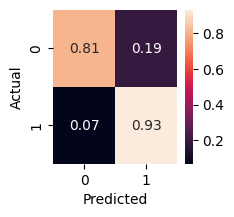

                     0             1  accuracy     macro avg  weighted avg
precision     0.873521      0.894393  0.887318      0.883957      0.886756
recall        0.809216      0.932388  0.887318      0.870802      0.887318
f1-score      0.840140      0.912995  0.887318      0.876568      0.886337
support    7118.000000  12335.000000  0.887318  19453.000000  19453.000000


In [180]:
accuracy(clf,nbag_x,nbag_y)

##### Here is the base model accuracy for the bag of words data

10 Fold CV score: 


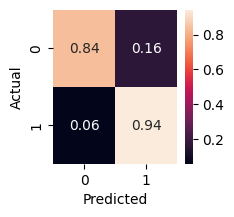

                     0             1  accuracy     macro avg  weighted avg
precision     0.894563      0.909183  0.904179      0.901873      0.903834
recall        0.836752      0.943089  0.904179      0.889920      0.904179
f1-score      0.864692      0.925826  0.904179      0.895259      0.903457
support    7118.000000  12335.000000  0.904179  19453.000000  19453.000000


In [178]:
accuracy(clf,bag_x,bag_y)

# Exploring different ways of improving accuracy

### 1. Undersampling to reduce label imbalance

In [59]:
df_zero = df.loc[df['label'] == 0,:]
df_one = df.loc[df['label'] == 1,:]
df_zero.shape, df_one.shape

((47454, 21), (82231, 21))

##### Undersampling for Feature Mean and Variance data

In [65]:
clf = DecisionTreeClassifier()
data=pd.concat(
  [
    nbag_data.loc[df['label'] == 0,:].sample(n=4000,random_state=42),
    nbag_data.loc[df['label'] == 1,:].sample(n=4000,random_state=42)
  ]
)
accuracy(clf,data.drop(['label'], axis='columns'),data['label'])

10 Fold CV score: 
0.73475
confusion matrix: 
[[ 5761  1357]
 [  807 11528]]


##### Undersampling for Bag of Words data

In [66]:
data=pd.concat(
  [
    bag_data.loc[df['label'] == 0,:].sample(n=4000,random_state=42),
    bag_data.loc[df['label'] == 1,:].sample(n=4000,random_state=42)
  ]
)
accuracy(clf,data.drop(['label'], axis='columns'),data['label'])

10 Fold CV score: 
0.7690000000000001
confusion matrix: 
[[ 5758  1360]
 [  808 11527]]


## 2. Oversampling to reduce label imbalancer

##### Data processing for Feature Mean and Variance data

In [79]:
clf = DecisionTreeClassifier()

In [96]:
x_train, x_test, y_train, y_test = train_test_split(nbag_x, nbag_y, test_size=0.15, random_state=102, stratify=nbag_y)
nbag_train=x_train.join(y_train)
nbag_test=x_test.join(y_test)
nbag_train.shape

(110232, 21)

In [102]:
df_zero = nbag_train.loc[df['label'] == 0,:]
df_one = nbag_train.loc[df['label'] == 1,:]
df_zero.shape, df_one.shape

((40336, 21), (69896, 21))

In [98]:
nbag_zero_duplicated=nbag_train.loc[df['label'] == 0,:].sample(n=29560,random_state=42)
data=pd.concat(
  [
    nbag_train,
    nbag_zero_duplicated
  ]
)

In [99]:
data.loc[df['label'] == 0,:].shape,data.loc[df['label'] == 1,:].shape

((69896, 21), (69896, 21))

##### Oversampling for Feature Mean and Variance data

In [104]:
clf.fit(data.drop(['label'], axis='columns'), data['label'])
y_pred = clf.predict(nbag_test.drop(['label'], axis='columns'))
accuracy_score(nbag_test['label'], y_pred)

0.8869069038194622

##### Oversampling for Bag of Words data

In [105]:
x_train, x_test, y_train, y_test = train_test_split(bag_x, bag_y, test_size=0.15, random_state=102, stratify=bag_y)
bag_train=x_train.join(y_train)
bag_test=x_test.join(y_test)
bag_train.shape

(110232, 112)

In [106]:
bag_zero_duplicated=bag_train.loc[df['label'] == 0,:].sample(n=29560,random_state=42)
data=pd.concat(
  [
    bag_train,
    bag_zero_duplicated
  ]
)

In [107]:
data.loc[df['label'] == 0,:].shape,data.loc[df['label'] == 1,:].shape

((69896, 112), (69896, 112))

In [108]:
clf.fit(data.drop(['label'], axis='columns'), data['label'])
y_pred = clf.predict(bag_test.drop(['label'], axis='columns'))
accuracy_score(bag_test['label'], y_pred)

0.9074692849431965

## 3. Feature scaling to reduce outlier influence

In [109]:
nbag_scaled = nbag_data.drop(['label'], axis='columns').copy()
nbag_scaled.values[:] = StandardScaler().fit_transform(nbag_data.drop(['label'], axis='columns'))

In [111]:
accuracy(clf,nbag_scaled,nbag_y)

10 Fold CV score: 
0.8918153324049104
confusion matrix: 
[[ 5763  1355]
 [  807 11528]]


## 4. Feature selection

In [112]:
sum = 0
for i,v in enumerate(clf.feature_importances_):
    sum += v*100
    print('Feature: %0d, Score: %.5f' % (nbag_scaled.columns[i],v*100))
sum

Feature: 0, Score: 1.88737
Feature: 1, Score: 2.93692
Feature: 2, Score: 4.34267
Feature: 3, Score: 6.40224
Feature: 4, Score: 3.17211
Feature: 5, Score: 7.87220
Feature: 6, Score: 18.69905
Feature: 7, Score: 3.42619
Feature: 8, Score: 3.20340
Feature: 9, Score: 2.97624
Feature: 10, Score: 3.35128
Feature: 11, Score: 2.69267
Feature: 12, Score: 7.07028
Feature: 13, Score: 2.55435
Feature: 14, Score: 3.08040
Feature: 15, Score: 12.17829
Feature: 16, Score: 5.49833
Feature: 17, Score: 4.06994
Feature: 4123, Score: 2.32909
Feature: 4124, Score: 2.25698


100.0

In [116]:
imp=pd.DataFrame(mutual_info_classif(nbag_scaled,nbag_y))
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
15,0.222200
12,0.214917
10,0.209954
14,0.208025
9,0.198124
11,0.185126
16,0.173270
13,0.172995
2,0.169190
4,0.166903


In [133]:
nbag_selective_features = nbag_scaled.copy()
nbag_selective_features.drop(list(nbag_selective_features.columns[imp['Importance'] < 0.1]), axis='columns', inplace=True)

In [134]:
accuracy(clf,nbag_selective_features,nbag_y)

10 Fold CV score: 
0.904214636725197
confusion matrix: 
[[ 5739  1379]
 [  802 11533]]


## 4. Combining the bag of words and feature mean and variance data

In [144]:
all_data_x=nbag_x.join(bag_x)
all_data_y=nbag_y
all_data_x.shape

(129685, 131)

In [145]:
accuracy(clf,all_data_x,all_data_y)

10 Fold CV score: 
0.9046002107050797
confusion matrix: 
[[ 5778  1340]
 [  816 11519]]


## 5. Hyperparameter Tuning

In [182]:
all_data_x.shape

(129685, 131)

In [186]:
t_clf=DecisionTreeClassifier()
search_space={
    'max_depth':[131,100],
    'min_samples_split':[2,50],
    'criterion':['gini','entropy','log_loss']
}
gscv=GridSearchCV(estimator=t_clf,param_grid=search_space,verbose=0,cv=5)

In [188]:
gscv.fit(all_data_x,all_data_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [131, 100, 50],
                         'min_samples_split': [2, 50, 500]})

In [189]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 131, 'min_samples_split': 2}

The only parameter that isn't the default one is the criterion.

10 Fold CV score: 
0.9078927546535421


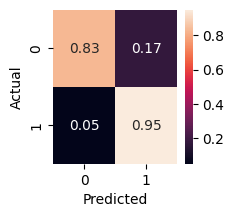

                     0             1  accuracy     macro avg  weighted avg
precision     0.905391      0.905501  0.905464      0.905446      0.905461
recall        0.828182      0.950061  0.905464      0.889121      0.905464
f1-score      0.865067      0.927246  0.905464      0.896157      0.904494
support    7118.000000  12335.000000  0.905464  19453.000000  19453.000000


In [191]:
clf=DecisionTreeClassifier(criterion='entropy')
accuracy(clf,all_data_x,all_data_y)

# Building and evaluating our final model

In order to build best model, we need to:
- Train it on the joined data
- Train it on normalized nbag data
- Remove bad features

In [151]:
#set the final data
final_x=all_data_x
final_y=all_data_y

In [152]:
#change with actuall best model
best_model=DecisionTreeClassifier()

# What makes a good commerial? A model explanation

For shap, let's take a smaller subset of the data to accelerate calculations. The results should be a good enough approximation.

In [153]:
small_final_x=final_x.sample(n=1000,random_state=42)
small_final_y=final_y.sample(n=1000,random_state=42)

In [154]:
best_model.fit(small_final_x,small_final_y)
explainer=shap.Explainer(best_model.predict,small_final_x)
sv=explainer(small_final_x)

Permutation explainer: 1001it [00:50, 17.01it/s]                         


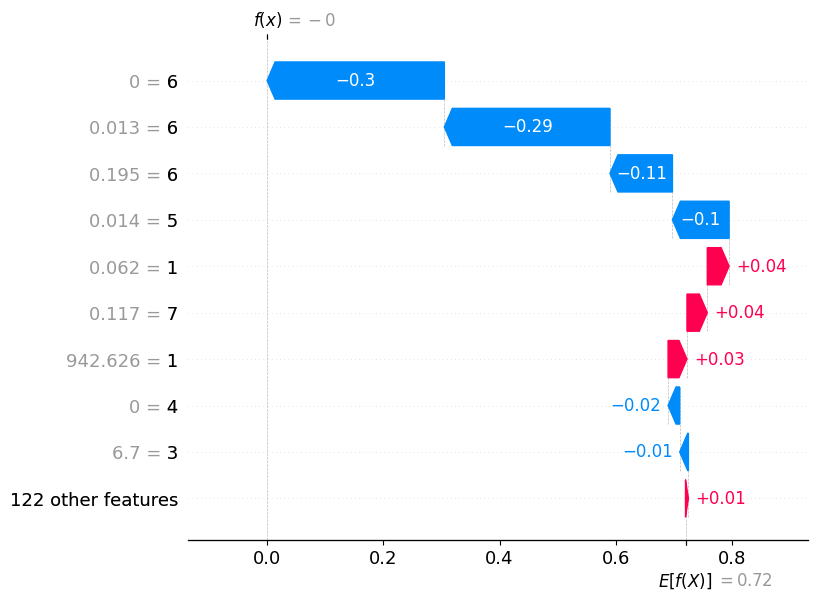

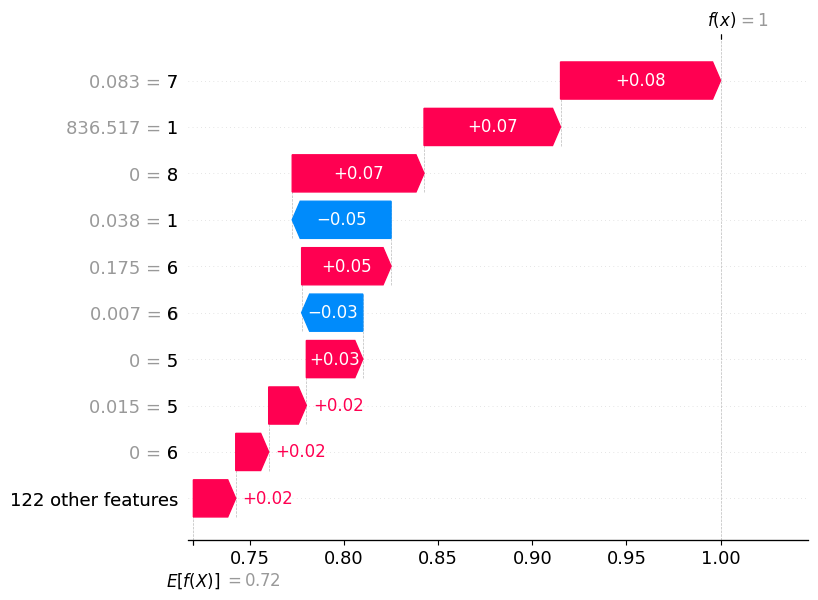

In [156]:
#Look for commercial example
a=1
#Look for a non commercial example
b=2
for idx in [a,b]:
  exp = shap.Explanation(
    sv.values, 
    sv.base_values[0], 
    sv.data, feature_names=''.join(str(e) for e in list(small_final_x.columns))
  )
  shap.plots.waterfall(exp[idx])
  #shap.initjs()
  #shap.plots.force(exp[idx])

As we can see, the features do not necessarly all point to the same conclusion. We can also see that the weight of each feature in the classification is not necessarly the same, but stays relatively close to its average importance.

#### Let's try to understand the model better by visualizing it

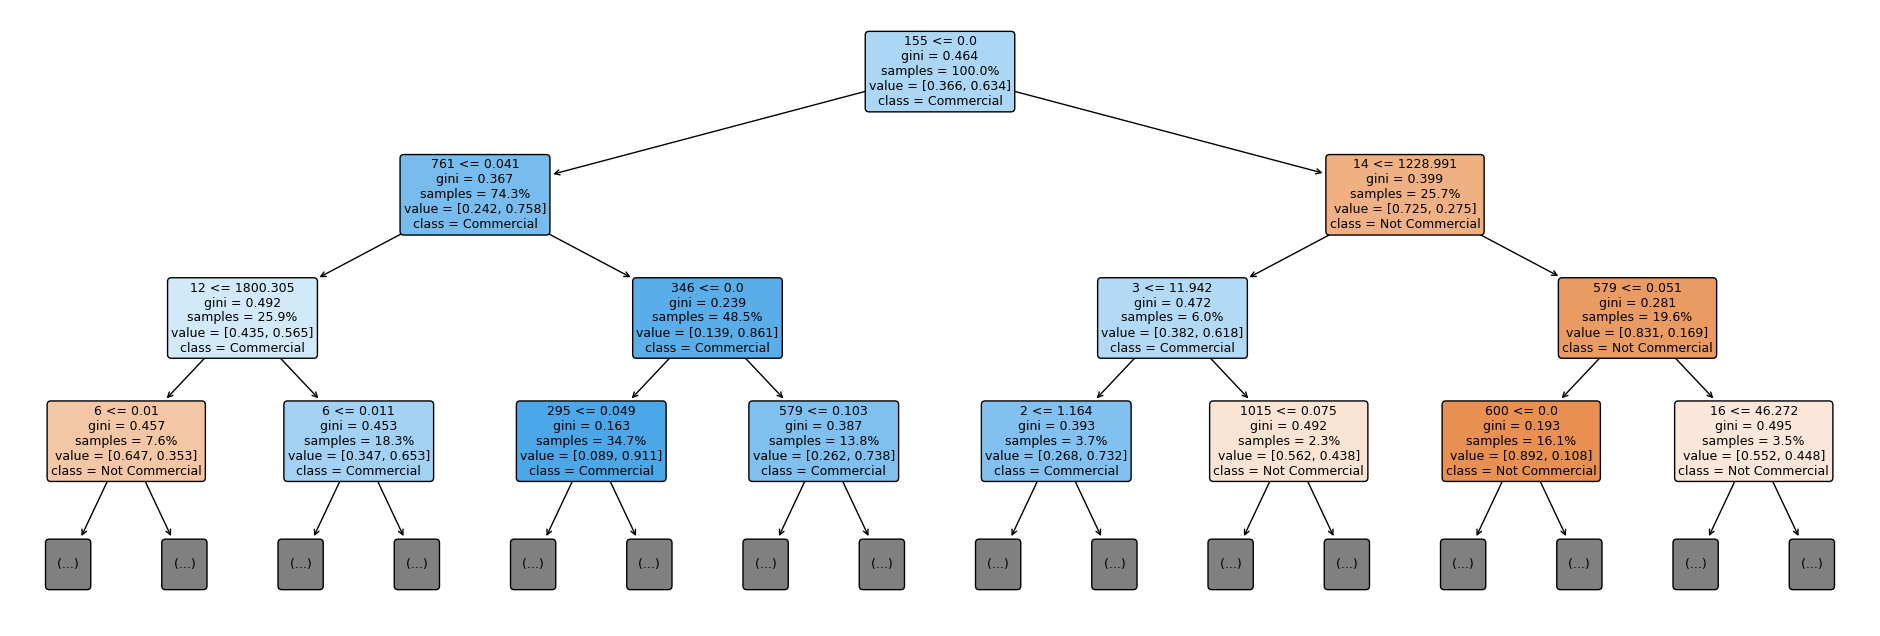

In [157]:
best_model.fit(final_x,final_y)
fig = plt.figure(figsize=(24, 8))
vis = tree.plot_tree(
  best_model, 
  feature_names = list(final_x.columns), 
  class_names = ['Not Commercial', 'Commercial'], 
  max_depth=3, 
  fontsize=9, 
  proportion=True, 
  filled=True, 
  rounded=True
)
fig.savefig("decision_tree.jpg")

As we can see, bla bla bla

# Conclusion

enter conclusion